In [4]:
from src import espresso_machine as esma

In [5]:
#Step 1 - Initialize model
model = esma.project(project_id="P") #Define project
model.set_cores(8) #Define number of prcessing cores
model.get_structure(format='poscar',path='./Research/BP',name='P.poscar') #Load structure
model.set_pseudo(path='./Research/BP')
model.ecutwfc(50) #Wavefunction cut-off
model.k_points(8) #k mesh 
model.degauss(0.01) #degauss value
model.conv_thr("1e-8") #electron convergence threshold

In [6]:
shift_y = [0,0.25,0]
model.shift_atoms(shift_y)

In [7]:
#Step 2 - Crystal optimization
model.calculate('vc-relax')

In [ ]:
#Step 3 - Atomic optimization
model.get_structure('vc-relax') #Get vc-relaxed strucutre
model.make_layer(layer_type='mono',direction='y')
model.k_points([8,1,8])
model.calculate('relax')

In [ ]:
#Step 4 - Scf calculation
model.get_structure('relax') #Get relaxed strucutre
model.calculate('scf')

In [9]:
# Step 5 - Run ph.x
model.set_q(nq1=6,nq2=1,nq3=6) #Set parameters
model.calculate('ph')

In [10]:
#Step- 2 - Run q2r.x
model.calculate('q2r') #Run calculation

In [11]:
#Step 5 - Bands calculation
# path = ['GAMMA','X',"U","Z","GAMMA"] #define corners
path = ['U','X',"GAMMA","Z","U"] #define corners
model.band_points(path,number=50) #define path
model.calculate('bands')

NameError: name 'FlaskRedirectException' is not defined

TypeError: 0 must be a sequence

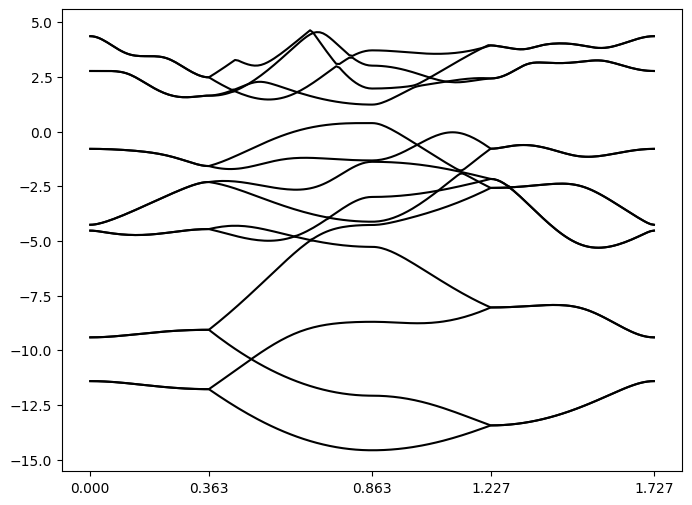

In [ ]:
#Step 6 - Plotting
model.plot('electron',ylim=[-3,3],save=True) #plot electron bands

In [ ]:
#Step 3 - Run matdyn.x
num_points = 200 # Number of q points
model.calculate("matdyn") #Run calculation

matdyn is finished


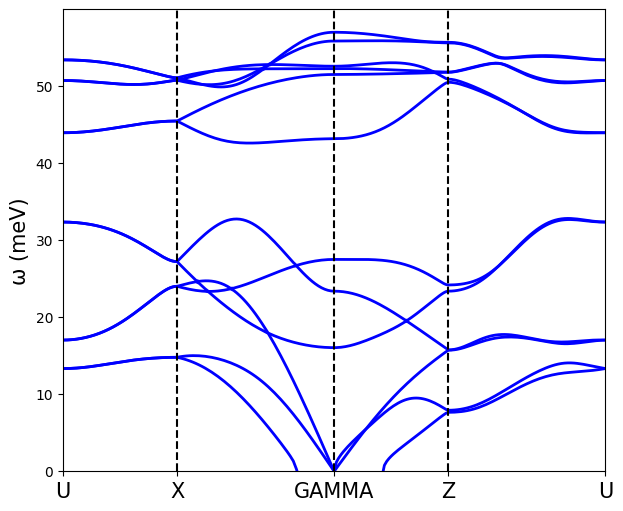

In [ ]:
#Step 4 - Plotting
model.plot('phonon',save=True) # Plot phonon band